In [20]:
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")
from dotenv import load_dotenv; load_dotenv()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import json
import yaml
import matplotlib.pyplot as plt

In [26]:
from rag.data import extract_article, chunk_article
from rag.embed import EmbedChunks
from rag.index import set_index

## Loading data

In [4]:
# Load from json file
with open('../data/ArticulosDiscolab.json') as f:
    data = json.load(f)

print(f'Cargados {len(data)} artículos.')
print(f'Propiedades de cada artículo: {",".join([key for key, value in data[0].items()])}')

Cargados 864 artículos.
Propiedades de cada artículo: ID_CONSTITUCION,NOMBRE_CONSTITUCION,ID_CAPITULO,NOMBRE_CAPITULO,TITULO_CAPITULO,ID_ARTICULO,NOMBRE_ARTICULO,CONTENIDO_ARTICULO


In [5]:
documents = []
for record in data:
    documents.append(extract_article(record))

In [6]:
documents[0]

{'id_constitucion': 1,
 'id_capitulo': 1,
 'id_articulo': 1,
 'source': 'Capítulo I: BASES DE LA INSTITUCIONALIDAD, Artículo 1',
 'text': 'Capítulo I: BASES DE LA INSTITUCIONALIDAD\nArtículo 1\n\nLas personas nacen libres e iguales en dignidad y derechos.\nLa familia es el núcleo fundamental de la sociedad.\nEl Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.\nEl Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta Constitución establece.\nEs deber del Estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de é

In [7]:
article_lengths = []
for article in documents:
    article_lengths.append(len(article["text"]))

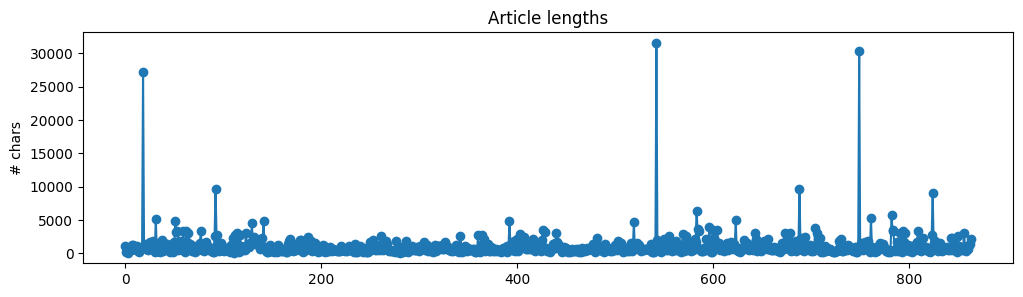

In [8]:
# Plot
plt.figure(figsize=(12, 3))
plt.plot(article_lengths, marker='o')
plt.title("Article lengths")
plt.ylabel("# chars")
plt.show()

## Ingesting Data

In [9]:
with open('../config.YAML') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [10]:
chunk_article(article=documents[0],
              chunk_size=config["chunk_size"],
              chunk_overlap=config["chunk_overlap"])

[{'text': 'Capítulo I: BASES DE LA INSTITUCIONALIDAD\nArtículo 1\n\nLas personas nacen libres e iguales en dignidad y derechos.\nLa familia es el núcleo fundamental de la sociedad.\nEl Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.\nEl Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta Constitución establece.\nEs deber del Estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de ésta, promover la integración armónica de todos los sectores de la Nación y asegurar el derecho de las personas a participar con 

In [11]:
chunks_ds = []
for doc in documents:
    chunks_ds += chunk_article(article=doc,
                                chunk_size=config["chunk_size"],
                                chunk_overlap=config["chunk_overlap"])

In [14]:
len(chunks_ds)

1384

In [23]:
embedded_chunks = []
embedder = EmbedChunks(config["embedding_model"])
for chunk in chunks_ds:
    embedded_chunks.append(embedder(chunk))


In [28]:
set_index(embedded_chunks)

Storing chunk 1384/1384